In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
plt.style.use('fivethirtyeight')

# Statistical Significance in Data

How many measurements do you need to _prove_ two measurements are different?

This is a problem of constant debate with many different approaches, 
- [Student t-test](https://en.wikipedia.org/wiki/Student%27s_t-test)
- [Analysis of Variance (ANOVA)](https://en.wikipedia.org/wiki/Analysis_of_variance)
- [Analysis of Covariance (ANCOVA)](https://en.wikipedia.org/wiki/Analysis_of_covariance)
- [Permutation test](https://en.wikipedia.org/wiki/Permutation_test)
- [Bootstrapping test](https://en.wikipedia.org/wiki/Bootstrapping_(statistics))
- [Wilcoxon test](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test)

In all of these approaches, scientists and engineers create a quantitative test to accept or reject the hypothesis that two set of data are _not_ significantly different. This concept was _very_ strange to me at first. How can two different measurements be considered the same? It wasn't until I started practicing, building, and applying engineering concepts that this question started to make sense. 

## Generate some data we _know_ is different

Monte Carlo experiments are a great way to start understanding this difficult question, lets build x2 100-value data sets:
- normal distribution at $0 \pm 1$
- normal distribution at $1 \pm 1$

(array([ 0.,  0.,  0.,  1.,  2., 13., 15., 23., 21.,  9.,  7.,  7.,  1.,
         1.,  0.,  0.]),
 array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,
         2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 [<matplotlib.patches.Polygon at 0x7f353d67eee0>])

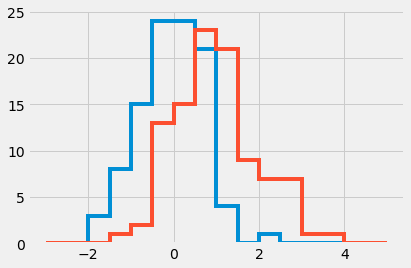

In [2]:
rng = default_rng(42)

set_01 = rng.normal(loc = 0, scale = 1, size = 100)
set_02 = rng.normal(loc = 1, scale = 1, size = 100)

plt.hist(set_01,
        histtype='step',
        linewidth = 4, 
        bins = np.linspace(-3,5, 17))
plt.hist(set_02, 
        histtype = 'step',
        linewidth = 4,
        bins =np.linspace(-3, 5, 17))

In [3]:
print('set01 = {:1.2f} +/- {:1.2f}'.format(np.mean(set_01), np.std(set_01)))
print('set02 = {:1.2f} +/- {:1.2f}'.format(np.mean(set_02), np.std(set_02)))

set01 = -0.05 +/- 0.77
set02 = 0.99 +/- 0.97


# Are these measurements different?

The two histograms are different, but many of the values lie directly on top of each other. for example, both sets of data have ~20-23 measurements from 1/2-1. If we only consider the reported means, -0.05 and 0.99, there is a significant difference between the two results, but how accurate is this value of mean?

Lets calculate more data sets and see how much the much the mean can change. 

Text(0.5, 1.0, 'range of means using x50 sets of 100 data points\nlocated at 0 and 1')

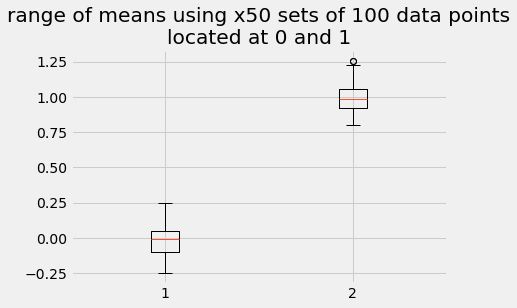

In [4]:
set_01 = rng.normal(loc = 0, scale = 1, size = (50,100))
set_02 = rng.normal(loc = 1, scale = 1, size = (50, 100))

mean_01 = np.mean(set_01, axis = 1)
mean_02 = np.mean(set_02, axis = 1)

plt.boxplot([mean_01, mean_02])
plt.title('range of means using x50 sets of 100 data points\nlocated at 0 and 1')

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.,  6., 12., 13.,  8.,  4.,  3.,
         2.,  0.,  0.,  0.]),
 array([-0.5       , -0.43333333, -0.36666667, -0.3       , -0.23333333,
        -0.16666667, -0.1       , -0.03333333,  0.03333333,  0.1       ,
         0.16666667,  0.23333333,  0.3       ,  0.36666667,  0.43333333,
         0.5       ,  0.56666667,  0.63333333,  0.7       ,  0.76666667,
         0.83333333,  0.9       ,  0.96666667,  1.03333333,  1.1       ,
         1.16666667,  1.23333333,  1.3       ,  1.36666667,  1.43333333,
         1.5       ]),
 [<matplotlib.patches.Polygon at 0x7f353ccf1220>])

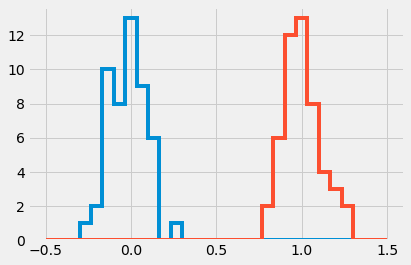

In [5]:
plt.hist(mean_01,
        histtype='step',
        linewidth = 4, 
        bins = np.linspace(-0.5,1.5, 31))
plt.hist(mean_02, 
        histtype = 'step',
        linewidth = 4,
        bins =np.linspace(-0.5, 1.5, 31))

## T-test and the _p-value_ for reporting significance

This process is the same idea that William Gossett proposed in the formulation of the Student t-test. Rather than trying to prove that the two data sets are different, he built a test to see if the 2 means of the data sets were different _assuming the mean is calculated from randomly sampled normally distributed data sets_.  

The [T-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) is now a standard way for scientists and engineers to discuss "how likely it is that any observed difference between groups is due to chance. Being a probability, P can take any value between 0 and 1" [What does the P-value mean? Dahiru and Dip 2008](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4111019/). Let's look at the p-value for 5 of the 50 data sets we made

In [6]:
from scipy.stats import ttest_ind

In [7]:
for i in range(0, 50, 10):
    print(ttest_ind(set_01[i, :], set_02[i,:]))

Ttest_indResult(statistic=-7.718457468309859, pvalue=5.681903155265593e-13)
Ttest_indResult(statistic=-7.992858451106185, pvalue=1.0707698163938262e-13)
Ttest_indResult(statistic=-7.191893442853354, pvalue=1.2834966766972937e-11)
Ttest_indResult(statistic=-8.008847401439036, pvalue=9.706920147642765e-14)
Ttest_indResult(statistic=-4.612392634969165, pvalue=7.1356528271453265e-06)


In all 5 data sets, the p-value is much less than 1%. The largest is 7e-4%. With 100 data points, and a standard deviation of equal to the difference between the means, we can be almost certain that the difference in the means is _not_ by chance. Thus we reject this null hypothesis. 

## When is the p-value < 0.05?

Now, lets decrease the number of times we ask for values from these normal distributions. We will only create 5 measurements from the normal distributions, but do the same experiment 50 times again. 

Text(0.5, 1.0, 'range of means using x50 sets of 5 data points\nlocated at 0 and 1')

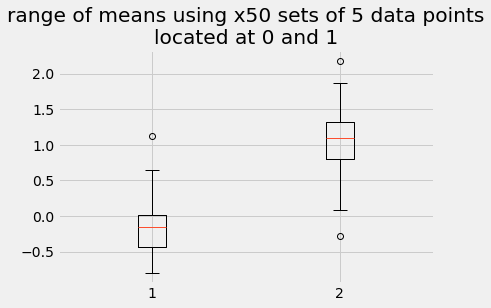

In [9]:
set_01 = rng.normal(loc = 0, scale = 1, size = (50,5))
set_02 = rng.normal(loc = 1, scale = 1, size = (50,5))

mean_01 = np.mean(set_01, axis = 1)
mean_02 = np.mean(set_02, axis = 1)

plt.boxplot([mean_01, mean_02])
plt.title('range of means using x50 sets of 5 data points\nlocated at 0 and 1')

The _population_ means are still where we expect them, at 0 and 1, but each set has a _sample_ mean that varies from -1 to 0.9 and 0 to 2 for the $\times 5$ data points, at 0 and 1 respectively. Considering the T-test, the probability that these means are different by chance is much higher. 



In [10]:
for i in range(0, 50, 10):
    print(ttest_ind(set_01[i, :], set_02[i,:]))

Ttest_indResult(statistic=-2.5538426887535235, pvalue=0.03397090031272734)
Ttest_indResult(statistic=-1.2336932809530161, pvalue=0.25233097441867186)
Ttest_indResult(statistic=-1.7234031645122094, pvalue=0.12310838248726863)
Ttest_indResult(statistic=-0.6543142468045674, pvalue=0.5312653625084551)
Ttest_indResult(statistic=-1.0451869664276245, pvalue=0.3264867551084358)


In the case of using 5 randomly sampled values from the normal distributions, the chance that the means are equal is as high as 53% and as low as 3%. This means we cannot claim the results are _statistically significant_ even though we _know_ that `set_01` has a mean of 0 and `set_02` has a mean of 1. 